# Di-Know: Diabetes prediction using machine learning models

The notebook contains code for EDA and ML model training and testing

In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.8 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [104]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve 
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score


In [3]:
import tensorflow as tf

In [130]:
df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_8944\1539008674.py:1: SyntaxWarning: invalid escape sequence '\A'
  df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")


In [131]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age. Lowest correlation for blood pressure.

Correlation with target Outcome:
 BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


In [132]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
if isinstance(df, pd.DataFrame):
  print("The loaded data is a DataFrame")
else:
  print("The loaded data is not a DataFrame")

The loaded data is a DataFrame


In [134]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### EDA

In [ ]:
#!pip install seaborn

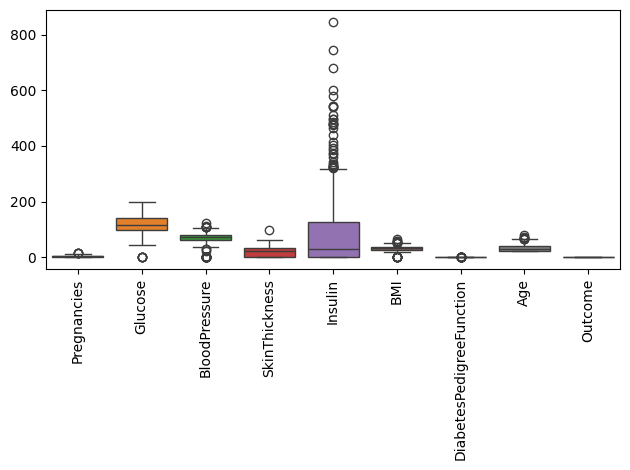

In [135]:
import seaborn as sns
sns.boxplot(data=df)  #making a box plot to visualize the spread of data across all the columns

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [136]:
print(f"shape of dataset, {df.shape}")

shape of dataset, (768, 9)


In [137]:
#df= df.drop('BloodPressure', axis=1)

In [138]:
df= df.drop('SkinThickness', axis=1)#removing skin thickness column

In [139]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [140]:
df.info()
 #shows zero null values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [141]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [142]:
missing_values = df.isnull().sum()

print("Missing values count:\n", missing_values)

Missing values count:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [143]:
class_counts = df['Outcome'].value_counts()
class_counts

Outcome
0    500
1    268
Name: count, dtype: int64

In [144]:
X_n= df.iloc[:,:-1] #This line creates a new DataFrame X containing all the rows and all columns except the last column from the DataFrame df. Essentially, it's selecting all the features (independent variables) and excluding the 'Price' column.
Y_n = df['Outcome']

In [145]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age.


Correlation with target Outcome:
 BloodPressure               0.065068
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


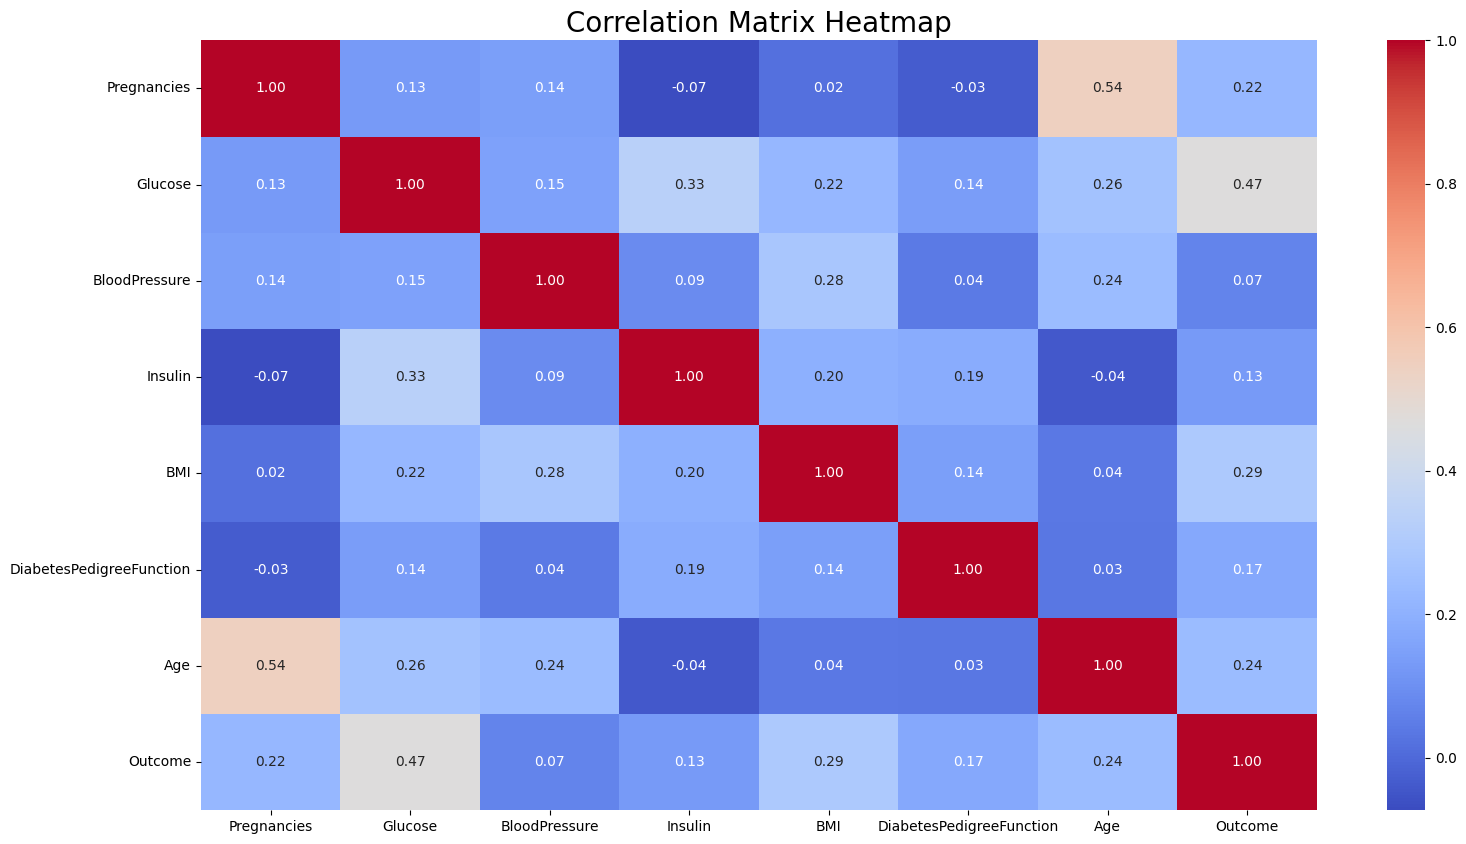

In [146]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #uses seaborn (sns) library, annot helps to display correlaton value with the each cells itself
#fmt=.2f is for displaying values with 2 decimal places
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.show()

In [147]:
x_train,X_, y_train, y_= train_test_split(X_n,Y_n, test_size=0.3, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
del X_, y_

print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")

print(f"shape of y_train (target), {y_train.shape}")
print(f"shape of y_test (target), {y_test.shape}")
print(f"shape of y_cv (target), {y_cv.shape}")


shape of X_train, (537, 7)
shape of X_test, (116, 7)
shape of X_cv, (115, 7)
shape of y_train (target), (537,)
shape of y_test (target), (116,)
shape of y_cv (target), (115,)


In [148]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,58,23.9,0.260,22
139,5,105,72,325,36.9,0.159,28
485,0,135,68,250,42.3,0.365,24
547,4,131,68,166,33.1,0.160,28
18,1,103,30,83,43.3,0.183,33


In [149]:
y_train.head()

334    0
139    0
485    1
547    0
18     0
Name: Outcome, dtype: int64

In [150]:
from sklearn.preprocessing import StandardScaler
scaler=  StandardScaler()


x_train_nor = scaler.fit_transform(x_train) # Normalizing our data. Also scaling functions convert df to numpy arrays
x_test_nor = scaler.transform(x_test)
x_cv_nor = scaler.transform(x_cv)

print(x_train_nor) # Print the normalized data

[[-0.8362943  -0.80005088 -0.53576428 ... -1.06015343 -0.61421636
  -0.94861028]
 [ 0.39072767 -0.49054341  0.12804365 ...  0.64646721 -0.90973787
  -0.43466673]
 [-1.14304979  0.43797901 -0.09322566 ...  1.35537117 -0.30699103
  -0.77729576]
 ...
 [ 1.92450513 -0.6143464   0.90248622 ...  1.78859026  1.94892066
   0.42190587]
 [-1.14304979  0.62368349 -3.8548039  ...  1.36849903 -0.77514391
  -0.34900947]
 [-1.14304979  0.12847154  1.45565949 ... -1.24394334 -0.60836445
  -1.03426754]]


In [151]:
print(f"Computed mean of the training set: {scaler.mean_}")
print(f"Computed standard deviation of the training set: {scaler.scale_}")

Computed mean of the training set: [  3.72625698 120.84916201  69.68528864  79.83612663  31.97560521
   0.46991993  33.0744879 ]
Computed standard deviation of the training set: [  3.25992533  32.3093976   18.07751846 115.08942017   7.61739292
   0.3417687   11.67443374]


In [152]:
x_train_nor.shape

(537, 7)

In [153]:
x_train_nor_df= pd.DataFrame(x_train_nor) # scaling functions convert df to numpy arrays, so convert back to dataframe
x_train_nor_df.describe()

,0,1,2,3,4,5,6
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,9.592989e-17,2.150153e-16,1.835900e-16,-1.984756e-17,3.771037e-16,-9.923781e-17,-2.646342e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.143050e+00,-3.740372e+00,-3.854804e+00,-6.936878e-01,-4.197710e+00,-1.146740e+00,-1.034268e+00
25%,-8.362943e-01,-6.762479e-01,-3.144950e-01,-6.936878e-01,-6.794457e-01,-6.698095e-01,-7.772958e-01
50%,-2.227833e-01,-1.191344e-01,1.280436e-01,-3.808875e-01,3.202511e-03,-2.806574e-01,-3.490095e-01
75%,6.974832e-01,5.617820e-01,5.705823e-01,4.271798e-01,5.939558e-01,4.157200e-01,6.788776e-01
max,4.071794e+00,2.418827e+00,2.893910e+00,6.657118e+00,4.611078e+00,5.705848e+00,4.105168e+00


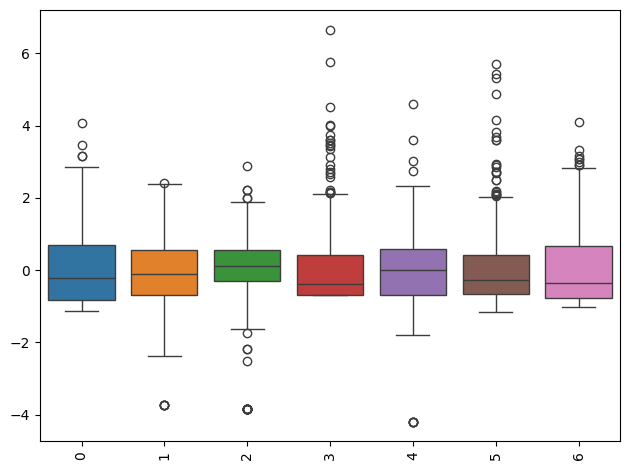

In [154]:
import seaborn as sns
sns.boxplot(data= x_train_nor)

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [155]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_nor, y_train = smote.fit_resample(x_train_nor, y_train)
count3= y_train.value_counts()
count3

Outcome
0    349
1    349
Name: count, dtype: int64

### Model 1: Neural networks for diabetes prediction

In [194]:
np.random.seed(50) #this seeding is done to fix the intialization at same point everytime we run the code fro first

tf.random.set_seed(50)


In [195]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall

model = Sequential([
    Dense(15, activation='relu', name='L1', kernel_regularizer=l2(0.001), input_shape=x_train_nor.shape[1:]),
    Dropout(0.5),  # dropout rate
    Dense(7, activation='relu', name='L2', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  #  dropout rate

    Dense(1, activation='sigmoid', name='L3')
])



# Callbacks for Early Stopping and Reduce Learning Rate
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True) #stops if no improvement in metric: val_loss for 10 epochs
]




EarlyStopping: Monitors a specific metric (usually validation loss) and stops training if it doesn't improve after a set number of epochs (patience). restore_best_weights=True means that the model will revert to the weights of the epoch with the best performance.

ReduceLROnPlateau: Reduces the learning rate by a factor (here, 0.5) if a monitored metric (usually validation loss) has stopped improving after a set number of epochs (patience).

In [196]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 15)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240 (960.00 B)

 Trainable params: 240 (960.00 B)

 Non-trainable params: 0 (0.00 B)

In [197]:
from tensorflow.keras.metrics import Recall # Import Recall

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Recall()]) 
history = model.fit(x_train_nor, y_train, epochs=30, validation_data=(x_cv_nor, y_cv), callbacks=callbacks)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.4955 - loss: 0.7777 - recall_9: 0.6152 - val_accuracy: 0.5565 - val_loss: 0.7057 - val_recall_9: 0.8919
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5251 - loss: 0.7395 - recall_9: 0.4622 - val_accuracy: 0.5391 - val_loss: 0.6980 - val_recall_9: 0.9189
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4993 - loss: 0.7500 - recall_9: 0.4457 - val_accuracy: 0.5565 - val_loss: 0.6890 - val_recall_9: 0.9189
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5028 - loss: 0.7438 - recall_9: 0.5069 - val_accuracy: 0.5304 - val_loss: 0.6835 - val_recall_9: 0.9189
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5844 - loss: 0.7200 - recall_9: 0.7226 - val_accuracy: 0.5478 - val_loss: 0.6777 - val_recall_9: 0.8649
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5522 - loss: 0.7029 - recall_9: 0.7395 - val_accuracy: 0.5478 - val_loss: 0.6721 - val_recall

I chose the best values for hyper parameters that give the lowest loss, and best accuracy/recall after experimenting with multiple sets of hyper paramter values


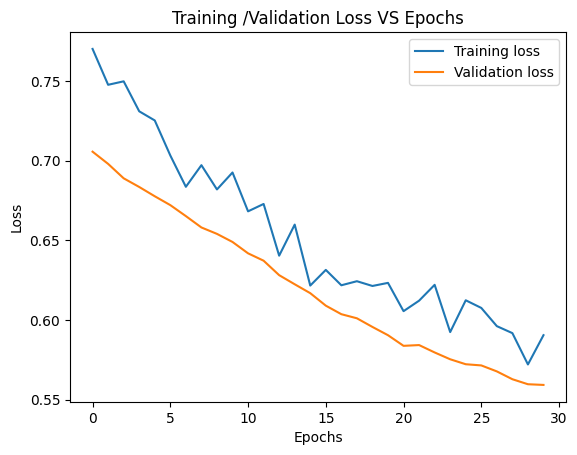

In [198]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training /Validation Loss VS Epochs')
plt.show()

In [199]:
test= model.evaluate(x_test_nor, y_test) #evaluating the model using test set


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7115 - loss: 0.5212 - recall_9: 0.7250


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
ANN AUC: 0.8461


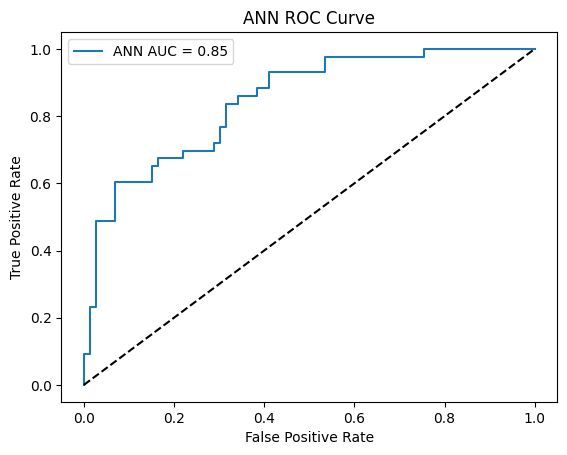

In [200]:
# Calculate AUC/ROC for ANN
y_pred_proba_ann = model.predict(x_test_nor) # Probabilities for class 1
auc_ann = roc_auc_score(y_test, y_pred_proba_ann)
print(f"ANN AUC: {auc_ann:.4f}")

fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)

plt.plot(fpr_ann, tpr_ann, label=f'ANN AUC = {auc_ann:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend()
plt.show()

In [201]:
from sklearn.metrics import roc_curve

# Assuming you have true labels y_true and predicted probabilities y_scores

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ann)

# Calculate specificity
specificity = 1 - fpr



# Print the specificity values for each threshold
for i, threshold in enumerate(thresholds):
    if specificity[i] > 0.85 or tpr[i] > 0.85:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity[i]:.2f}, Sensitivity: {tpr[i]:.2f}")



Threshold: inf, Specificity: 1.00, Sensitivity: 0.00
Threshold: 0.81, Specificity: 1.00, Sensitivity: 0.02
Threshold: 0.79, Specificity: 1.00, Sensitivity: 0.09
Threshold: 0.79, Specificity: 0.99, Sensitivity: 0.09
Threshold: 0.75, Specificity: 0.99, Sensitivity: 0.23
Threshold: 0.73, Specificity: 0.97, Sensitivity: 0.23
Threshold: 0.67, Specificity: 0.97, Sensitivity: 0.49
Threshold: 0.66, Specificity: 0.93, Sensitivity: 0.49
Threshold: 0.64, Specificity: 0.93, Sensitivity: 0.60
Threshold: 0.46, Specificity: 0.66, Sensitivity: 0.86
Threshold: 0.45, Specificity: 0.62, Sensitivity: 0.86
Threshold: 0.45, Specificity: 0.62, Sensitivity: 0.88
Threshold: 0.43, Specificity: 0.59, Sensitivity: 0.88
Threshold: 0.42, Specificity: 0.59, Sensitivity: 0.93
Threshold: 0.36, Specificity: 0.47, Sensitivity: 0.93
Threshold: 0.31, Specificity: 0.47, Sensitivity: 0.98
Threshold: 0.18, Specificity: 0.25, Sensitivity: 0.98
Threshold: 0.18, Specificity: 0.25, Sensitivity: 1.00
Threshold: 0.02, Specificity:

Based on the above model, threshold at 0.42 gives a good sensitivity of 0.93, with a specificity of 0.59. While the specificity is still low, atleast a higher threshold of sensitivity means, not missing out on too many patients affected by diabetes

### Model 2: SVM model for diabetes prediction

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, r2_score


svm = SVC(kernel='rbf', probability=True, C=10 ) 

# Fit the model
model_svm = svm.fit(x_train_nor, y_train)

# Predict the probabilities
y_pred_svm_prob = model_svm.predict_proba(x_test_nor)[:, 1]

# Convert probabilities to class labels based on a threshold of 0.5
y_pred_svm_class = (y_pred_svm_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm_class)
recall = recall_score(y_test, y_pred_svm_class)
f1 = f1_score(y_test, y_pred_svm_class)


print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)



Accuracy: 0.7241379310344828
Recall: 0.6511627906976745
F1-Score: 0.6363636363636364


Given below is a test run of Grid SearchCV for the SVM model. The results closely match the default parameter results


Gamma values: 
 Scale: Uses the inverse of the product of feature count and variance to adjust gamma.
    If scale is passed, then it uses 1 / (n_features * X.var()) as value of gamma.
    
Auto: Uses 1 / n_features. Uses only the number of features to set gamma, ignoring feature variance.
May lead to overfitting (high gamma values) for large datasets. 


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train_nor, y_train)

# Get the best estimator
best_svm = grid_search.best_estimator_



# Predict probabilities using the best estimator
y_pred_svm_prob = best_svm.predict_proba(x_test_nor)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred_svm_prob > 0.2).astype(int))
recall = recall_score(y_test, (y_pred_svm_prob > 0.2).astype(int))
f1 = f1_score(y_test, (y_pred_svm_prob > 0.2).astype(int))
auc_svm = roc_auc_score(y_test, y_pred_svm_prob)


# Print best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

#regularizer defines the flexibility of decision boundary
#kernel defines the type of decision boundary
#gamma defines the influence of a single training example reaches. Low value means tighter decision boundary

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, r2_score


svm = SVC(kernel='rbf', probability=True, C=1, gamma=1 ) 

# Fit the model
model_svm = svm.fit(x_train_nor, y_train)

# Predict the probabilities
y_pred_svm_prob = model_svm.predict_proba(x_test_nor)[:, 1]

# Convert probabilities to class labels based on a threshold of 0.5
y_pred_svm_class = (y_pred_svm_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm_class)
recall = recall_score(y_test, y_pred_svm_class)
f1 = f1_score(y_test, y_pred_svm_class)


print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)



Accuracy: 0.7155172413793104
Recall: 0.4883720930232558
F1-Score: 0.56


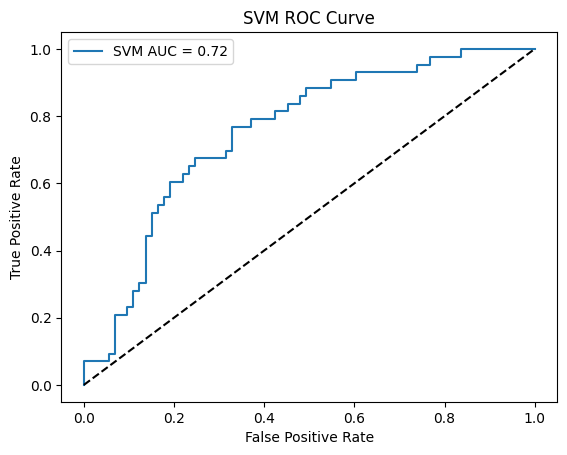

Threshold: 0.32, Specificity: 0.67, Sensitivity: 0.77
Threshold: 0.26, Specificity: 0.63, Sensitivity: 0.77
Threshold: 0.25, Specificity: 0.63, Sensitivity: 0.79
Threshold: 0.22, Specificity: 0.58, Sensitivity: 0.79
Threshold: 0.22, Specificity: 0.58, Sensitivity: 0.81
Threshold: 0.20, Specificity: 0.55, Sensitivity: 0.81
Threshold: 0.20, Specificity: 0.55, Sensitivity: 0.84
Threshold: 0.19, Specificity: 0.52, Sensitivity: 0.84
Threshold: 0.19, Specificity: 0.52, Sensitivity: 0.86
Threshold: 0.16, Specificity: 0.51, Sensitivity: 0.86
Threshold: 0.16, Specificity: 0.51, Sensitivity: 0.88
Threshold: 0.12, Specificity: 0.45, Sensitivity: 0.88
Threshold: 0.11, Specificity: 0.45, Sensitivity: 0.91
Threshold: 0.10, Specificity: 0.40, Sensitivity: 0.91
Threshold: 0.09, Specificity: 0.40, Sensitivity: 0.93


In [94]:
# Plot ROC Curve (using y_pred_svm_prob for probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_prob)  #probabilities
plt.plot(fpr, tpr, label=f'SVM AUC = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

# Calculate specificity
specificity = 1 - fpr

for i, threshold in enumerate(thresholds):
    if specificity[i] > 0.30 and tpr[i] > 0.75:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity[i]:.2f}, Sensitivity: {tpr[i]:.2f}")

### Model 3: Elastic net regression for diabetes prediciton

ElasticNetCV(cv=5) does 5-fold cross-validation to find the best alpha and l1_ratio automatically.

l1_ratio=1 → Pure Lasso

l1_ratio=0 → Pure Ridge

0 < l1_ratio < 1 → Elastic Net (a mix of both)

In [ ]:

# Define the parameter grid
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10],  # Regularization strength
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # ElasticNet mixing parameter (0=Ridge, 1=Lasso)
}

# Create ElasticNet model
elastic_net_en = ElasticNet()

# Perform GridSearchCV with 5-fold cross-validation
grid_search_en = GridSearchCV(estimator=elastic_net_en,
                           param_grid=param_grid_en,
                           cv=5,
                           scoring='neg_mean_squared_error',  # or try 'r2'
                           n_jobs=-1)  # Use all available cores

# Fit the grid search to the data
grid_search_en.fit(x_train_nor, y_train)

# Print the best parameters
print("Best ElasticNet Parameters:", grid_search_en.best_params_)

# Get the best model
best_elastic_en = grid_search_en.best_estimator_


Best ElasticNet Parameters: {'alpha': 0.01, 'l1_ratio': 0}


d:\Ash_ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.635e+01, tolerance: 1.745e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Accuracy: 0.7068965517241379
Precision: 0.5882352941176471
Recall: 0.6976744186046512
F1-Score: 0.6382978723404256


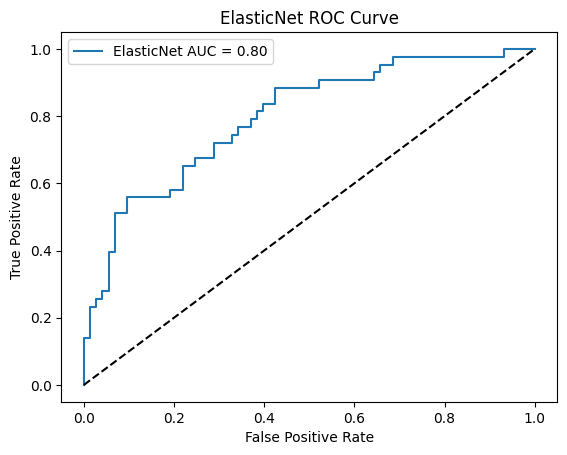

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


elastic_en = ElasticNet(l1_ratio=0, alpha=0.01, )
# Predict probabilities
y_pred_en = elastic_en.predict(x_test_nor)

# Convert probabilities to class labels based on a threshold of 0.5
y_pred_en_class = (y_pred_en > 0.5).astype(int)

# Evaluate the model
accuracy_en = accuracy_score(y_test, y_pred_en_class)
precision_en = precision_score(y_test, y_pred_en_class)
recall_en = recall_score(y_test, y_pred_en_class)
f1_en = f1_score(y_test, y_pred_en_class)

print("Accuracy:", accuracy_en)
print("Precision:", precision_en)
print("Recall:", recall_en)
print("F1-Score:", f1_en)


# Calculate ROC AUC score
auc_en = roc_auc_score(y_test, y_pred_en)

# Plot ROC Curve
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_en)
plt.plot(fpr_en, tpr_en, label=f'ElasticNet AUC = {auc_en:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ElasticNet ROC Curve')
plt.legend()
plt.show()


In [105]:

# Calculate specificity_en
specificity_en = 1 - fpr_en

# Print the specificity and sensitivity values for each threshold
for i, threshold in enumerate(thresholds_en):
    if specificity_en[i] > 0.30 and tpr_en[i] > 0.70:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity_en[i]:.2f}, Sensitivity: {tpr_en[i]:.2f}")


Threshold: 0.49, Specificity: 0.71, Sensitivity: 0.72
Threshold: 0.48, Specificity: 0.67, Sensitivity: 0.72
Threshold: 0.48, Specificity: 0.67, Sensitivity: 0.74
Threshold: 0.45, Specificity: 0.66, Sensitivity: 0.74
Threshold: 0.45, Specificity: 0.66, Sensitivity: 0.77
Threshold: 0.42, Specificity: 0.63, Sensitivity: 0.77
Threshold: 0.42, Specificity: 0.63, Sensitivity: 0.79
Threshold: 0.42, Specificity: 0.62, Sensitivity: 0.79
Threshold: 0.42, Specificity: 0.62, Sensitivity: 0.81
Threshold: 0.42, Specificity: 0.60, Sensitivity: 0.81
Threshold: 0.41, Specificity: 0.60, Sensitivity: 0.84
Threshold: 0.40, Specificity: 0.58, Sensitivity: 0.84
Threshold: 0.38, Specificity: 0.58, Sensitivity: 0.88
Threshold: 0.32, Specificity: 0.48, Sensitivity: 0.88
Threshold: 0.32, Specificity: 0.48, Sensitivity: 0.91
Threshold: 0.25, Specificity: 0.36, Sensitivity: 0.91
Threshold: 0.25, Specificity: 0.36, Sensitivity: 0.93
Threshold: 0.24, Specificity: 0.34, Sensitivity: 0.93
Threshold: 0.24, Specificity

with a thresholding around 0.4, we are able to acheive a sensitivity of 0.84 and specificity of 0.58 for the elastic net model

# XGBoost model for diabetes prediciton

In [ ]:


# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for weight updates
    'max_depth': [3, 5, 7],  # Tree depth
    
    
}

# 5-fold Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with cross-validation
grid_search_xgb.fit(x_train_nor, y_train)

# Get the best model
best_xgb = grid_search_xgb.best_estimator_

# Predict on test set
y_pred_xgb_prob = best_xgb.predict_proba(x_test_nor)[:, 1]  # Probabilities
y_pred_xgb_class = (y_pred_xgb_prob > 0.5).astype(int)  # Convert to class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_class)
precision = precision_score(y_test, y_pred_xgb_class)
recall = recall_score(y_test, y_pred_xgb_class)
f1 = f1_score(y_test, y_pred_xgb_class)
mae = mean_absolute_error(y_test, y_pred_xgb_prob)
r2 = r2_score(y_test, y_pred_xgb_prob)


d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:36:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [97]:

# Print results
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
print("\n")
print(" Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


 Accuracy: 0.7586206896551724
Precision: 0.6470588235294118
Recall: 0.7674418604651163
F1-Score: 0.7021276595744681


d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:39:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7586206896551724
Precision: 0.6470588235294118
Recall: 0.7674418604651163
F1-Score: 0.7021276595744681
XGBoost AUC: 0.7968


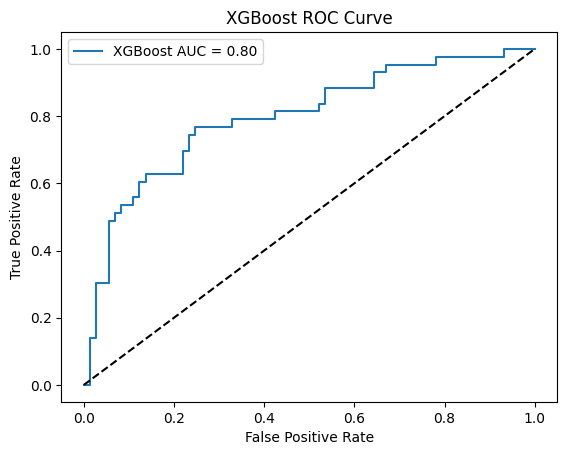

Threshold: 0.54, Specificity: 0.75, Sensitivity: 0.77
Threshold: 0.36, Specificity: 0.67, Sensitivity: 0.77
Threshold: 0.29, Specificity: 0.67, Sensitivity: 0.79
Threshold: 0.18, Specificity: 0.58, Sensitivity: 0.79
Threshold: 0.16, Specificity: 0.58, Sensitivity: 0.81
Threshold: 0.10, Specificity: 0.48, Sensitivity: 0.81
Threshold: 0.08, Specificity: 0.48, Sensitivity: 0.84
Threshold: 0.07, Specificity: 0.47, Sensitivity: 0.84
Threshold: 0.07, Specificity: 0.47, Sensitivity: 0.88
Threshold: 0.04, Specificity: 0.36, Sensitivity: 0.88
Threshold: 0.04, Specificity: 0.36, Sensitivity: 0.93
Threshold: 0.03, Specificity: 0.33, Sensitivity: 0.93
Threshold: 0.02, Specificity: 0.33, Sensitivity: 0.95


In [ ]:


# Define the XGBoost classifier with best parameters (without CV)
xgb_model = xgb.XGBClassifier(use_label_encoder=False,
                              eval_metric='logloss',
                              learning_rate=0.1,
                              max_depth=7,
                              n_estimators=100)

# Fit the model
xgb_model.fit(x_train_nor, y_train)

# Predict probabilities
y_pred_xgb_prob = xgb_model.predict_proba(x_test_nor)[:, 1]  # Probabilities for class 1
y_pred_xgb_class = (y_pred_xgb_prob > 0.5).astype(int)  # Convert to class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_class)
precision = precision_score(y_test, y_pred_xgb_class)
recall = recall_score(y_test, y_pred_xgb_class)
f1 = f1_score(y_test, y_pred_xgb_class)
auc = roc_auc_score(y_test, y_pred_xgb_prob)  # AUC score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(f"XGBoost AUC: {auc:.4f}")

# Plot ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb_prob)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

# Calculate specificity_xgb
specificity_xgb = 1 - fpr_xgb

# Print the specificity and sensitivity values for each threshold
for i, threshold in enumerate(thresholds_xgb):
    if specificity_xgb[i] > 0.30 and tpr_xgb[i] > 0.75:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity_xgb[i]:.2f}, Sensitivity: {tpr_xgb[i]:.2f}")


In [ ]:
# Calculate specificity
specificity = 1 - fpr

for i, threshold in enumerate(thresholds):
    if specificity[i] > 0.30 and tpr[i] > 0.75:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity[i]:.2f}, Sensitivity: {tpr[i]:.2f}")

### Pickle the models

In [107]:
scaler


StandardScaler()

In [ ]:
model

NameError: name 'model' is not defined

In [109]:
model_svm

SVC(C=1, gamma=1, probability=True)

In [110]:
model_en

ElasticNetCV(cv=5)

In [231]:
import pickle
pickle.dump(scaler,open('models3/diabetes3_scaler.pkl', 'wb'))
pickle.dump(model_en,open('models3/diabetes3_ene.pkl', 'wb'))
pickle.dump(model_svm,open('models3/diabetes3_svm.pkl', 'wb'))

In [230]:
model.save('models3/diabetes3_ann.h5')
